In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#Updated csv file where missing values in 'Purpose' column got deleted.
uber_df = pd.read_csv("Uber_trips_2016.csv", low_memory=False)
uber_df

,Unnamed: 0,START_DATE,END_DATE,CATEGORY,START,Latitude,Longitude,STOP,Latitude.1,Longitude.1,MILES,PURPOSE,SALARY,MONTH,DAY_OF_THE_WEEK,DURATION,money_regex
0,0,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.8,Errand/Supplies,$10.32,Jan,Sat,0 days 00:13:00,10.32
1,1,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.7,Meeting,$10.11,Jan,Tues,0 days 00:14:00,10.11
2,2,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,27.446706,-80.325606,West Palm Beach,26.715342,-80.053375,63.7,Customer Visit,$136.96,Jan,Wed,0 days 01:07:00,136.96
3,3,1/6/16 17:15,1/6/16 17:19,Business,West Palm Beach,26.715342,-80.053375,West Palm Beach,26.715342,-80.053375,4.3,Meal/Entertain,$9.25,Jan,Wed,0 days 00:04:00,9.25
4,4,1/6/16 17:30,1/6/16 17:35,Business,West Palm Beach,26.715342,-80.053375,Palm Beach,26.705621,-80.036430,7.1,Meeting,$15.27,Jan,Wed,0 days 00:05:00,15.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,12/30/16 16:45,12/30/16 17:08,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,4.6,Meeting,$9.89,Dec,Fri,0 days 00:23:00,9.89
567,567,12/30/16 23:06,12/30/16 23:10,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.8,Customer Visit,$1.72,Dec,Fri,0 days 00:04:00,1.72
568,568,12/31/16 1:07,12/31/16 1:14,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.7,Meeting,$1.51,Dec,Sat,0 days 00:07:00,1.51
569,569,12/31/16 21:32,12/31/16 21:50,Business,Katunayake,7.172485,79.885348,Gampaha,7.084048,80.009831,6.4,Temporary Site,$13.76,Dec,Sat,0 days 00:18:00,13.76


In [3]:
from datetime import datetime

In [4]:
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'], format = '%m/%d/%y %H:%M')
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'], format = '%m/%d/%y %H:%M')

uber_df

,Unnamed: 0,START_DATE,END_DATE,CATEGORY,START,Latitude,Longitude,STOP,Latitude.1,Longitude.1,MILES,PURPOSE,SALARY,MONTH,DAY_OF_THE_WEEK,DURATION,money_regex
0,0,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.8,Errand/Supplies,$10.32,Jan,Sat,0 days 00:13:00,10.32
1,1,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.7,Meeting,$10.11,Jan,Tues,0 days 00:14:00,10.11
2,2,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,27.446706,-80.325606,West Palm Beach,26.715342,-80.053375,63.7,Customer Visit,$136.96,Jan,Wed,0 days 01:07:00,136.96
3,3,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,26.715342,-80.053375,West Palm Beach,26.715342,-80.053375,4.3,Meal/Entertain,$9.25,Jan,Wed,0 days 00:04:00,9.25
4,4,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,26.715342,-80.053375,Palm Beach,26.705621,-80.036430,7.1,Meeting,$15.27,Jan,Wed,0 days 00:05:00,15.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,4.6,Meeting,$9.89,Dec,Fri,0 days 00:23:00,9.89
567,567,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.8,Customer Visit,$1.72,Dec,Fri,0 days 00:04:00,1.72
568,568,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.7,Meeting,$1.51,Dec,Sat,0 days 00:07:00,1.51
569,569,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,7.172485,79.885348,Gampaha,7.084048,80.009831,6.4,Temporary Site,$13.76,Dec,Sat,0 days 00:18:00,13.76


In [5]:
uber_df['MONTH'] = uber_df['START_DATE'].apply(lambda time: time.month)
uber_df['DAY_OF_THE_WEEK'] = uber_df['START_DATE'].apply(lambda time: time.dayofweek)

In [6]:
mmap = {1:'Jan', 2:'Feb',3:'Mar', 4:'Apr',5:'May',6:'June',7:'July', 8:'Aug', 9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
uber_df['MONTH'] = uber_df['MONTH'].map(mmap)
uber_df['MONTH']

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
566    Dec
567    Dec
568    Dec
569    Dec
570    Dec
Name: MONTH, Length: 571, dtype: object

In [7]:
uber_df['DAY_OF_THE_WEEK'] = uber_df.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
uber_df['DAY_OF_THE_WEEK'] = uber_df['DAY_OF_THE_WEEK'].map(day_label)
uber_df

,Unnamed: 0,START_DATE,END_DATE,CATEGORY,START,Latitude,Longitude,STOP,Latitude.1,Longitude.1,MILES,PURPOSE,SALARY,MONTH,DAY_OF_THE_WEEK,DURATION,money_regex
0,0,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.8,Errand/Supplies,$10.32,Jan,Sat,0 days 00:13:00,10.32
1,1,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.7,Meeting,$10.11,Jan,Tues,0 days 00:14:00,10.11
2,2,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,27.446706,-80.325606,West Palm Beach,26.715342,-80.053375,63.7,Customer Visit,$136.96,Jan,Wed,0 days 01:07:00,136.96
3,3,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,26.715342,-80.053375,West Palm Beach,26.715342,-80.053375,4.3,Meal/Entertain,$9.25,Jan,Wed,0 days 00:04:00,9.25
4,4,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,26.715342,-80.053375,Palm Beach,26.705621,-80.036430,7.1,Meeting,$15.27,Jan,Wed,0 days 00:05:00,15.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,4.6,Meeting,$9.89,Dec,Fri,0 days 00:23:00,9.89
567,567,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.8,Customer Visit,$1.72,Dec,Fri,0 days 00:04:00,1.72
568,568,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.7,Meeting,$1.51,Dec,Sat,0 days 00:07:00,1.51
569,569,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,7.172485,79.885348,Gampaha,7.084048,80.009831,6.4,Temporary Site,$13.76,Dec,Sat,0 days 00:18:00,13.76


In [8]:
#Calculating duration of each ride
uber_df['DURATION'] = uber_df['END_DATE'] - uber_df['START_DATE']
uber_df.dtypes

Unnamed: 0                   int64
START_DATE          datetime64[ns]
END_DATE            datetime64[ns]
CATEGORY                    object
START                       object
Latitude                   float64
Longitude                  float64
STOP                        object
Latitude.1                 float64
Longitude.1                float64
MILES                      float64
PURPOSE                     object
SALARY                      object
MONTH                       object
DAY_OF_THE_WEEK             object
DURATION           timedelta64[ns]
money_regex                float64
dtype: object

In [9]:
uber_df

,Unnamed: 0,START_DATE,END_DATE,CATEGORY,START,Latitude,Longitude,STOP,Latitude.1,Longitude.1,MILES,PURPOSE,SALARY,MONTH,DAY_OF_THE_WEEK,DURATION,money_regex
0,0,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.8,Errand/Supplies,$10.32,Jan,Sat,00:13:00,10.32
1,1,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.7,Meeting,$10.11,Jan,Tues,00:14:00,10.11
2,2,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,27.446706,-80.325606,West Palm Beach,26.715342,-80.053375,63.7,Customer Visit,$136.96,Jan,Wed,01:07:00,136.96
3,3,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,26.715342,-80.053375,West Palm Beach,26.715342,-80.053375,4.3,Meal/Entertain,$9.25,Jan,Wed,00:04:00,9.25
4,4,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,26.715342,-80.053375,Palm Beach,26.705621,-80.036430,7.1,Meeting,$15.27,Jan,Wed,00:05:00,15.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,4.6,Meeting,$9.89,Dec,Fri,00:23:00,9.89
567,567,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.8,Customer Visit,$1.72,Dec,Fri,00:04:00,1.72
568,568,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.7,Meeting,$1.51,Dec,Sat,00:07:00,1.51
569,569,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,7.172485,79.885348,Gampaha,7.084048,80.009831,6.4,Temporary Site,$13.76,Dec,Sat,00:18:00,13.76


In [10]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Unnamed: 0       571 non-null    int64          
 1   START_DATE       571 non-null    datetime64[ns] 
 2   END_DATE         571 non-null    datetime64[ns] 
 3   CATEGORY         571 non-null    object         
 4   START            571 non-null    object         
 5   Latitude         544 non-null    float64        
 6   Longitude        544 non-null    float64        
 7   STOP             571 non-null    object         
 8   Latitude.1       543 non-null    float64        
 9   Longitude.1      543 non-null    float64        
 10  MILES            571 non-null    float64        
 11  PURPOSE          571 non-null    object         
 12  SALARY           571 non-null    object         
 13  MONTH            571 non-null    object         
 14  DAY_OF_THE_WEEK  571 non-n

In [11]:
uber_df.describe()

,Unnamed: 0,Latitude,Longitude,Latitude.1,Longitude.1,MILES,DURATION,money_regex
count,571.000000,544.000000,544.000000,543.000000,543.000000,571.000000,571,571.000000
mean,285.000000,36.203147,-60.382207,36.598016,-60.158453,11.248862,0 days 00:22:31.313485,24.187723
std,164.977776,10.550109,51.831178,9.513798,51.345376,24.123120,0 days 00:25:47.681069,51.864529
min,0.000000,-37.845644,-122.419415,-32.046759,-122.935139,0.500000,0 days 00:02:00,1.080000
25%,142.500000,35.746230,-78.898619,35.738208,-78.898619,3.100000,0 days 00:11:00,6.670000
50%,285.000000,35.791540,-78.781117,35.791540,-78.781117,6.200000,0 days 00:17:00,13.330000
75%,427.500000,40.707348,-75.640182,40.714522,-75.640182,10.400000,0 days 00:25:00,22.360000
max,570.000000,57.204617,144.076842,57.204617,115.912701,310.300000,0 days 05:30:00,667.150000


In [12]:
uber_df.notnull().sum()

Unnamed: 0         571
START_DATE         571
END_DATE           571
CATEGORY           571
START              571
Latitude           544
Longitude          544
STOP               571
Latitude.1         543
Longitude.1        543
MILES              571
PURPOSE            571
SALARY             571
MONTH              571
DAY_OF_THE_WEEK    571
DURATION           571
money_regex        571
dtype: int64

In [13]:
uber_df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

In [14]:
sum(uber_df['CATEGORY']=='Business')

565

In [15]:
sum(uber_df['CATEGORY']=='Personal')

6

In [16]:
uber_total_count = uber_df.groupby(['CATEGORY']).sum()['MILES']
uber_total_count

CATEGORY
Business    6209.6
Personal     213.5
Name: MILES, dtype: float64

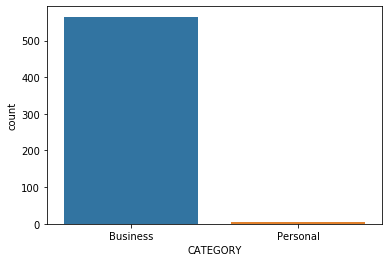

In [17]:
sns.countplot(x=uber_df['CATEGORY']);

In [18]:
uber_df['PURPOSE'].unique()

array(['Errand/Supplies', 'Meeting', 'Customer Visit', 'Meal/Entertain',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

In [19]:
sum(uber_df['PURPOSE']=='Errand/Supplies')

111

In [20]:
sum(uber_df['PURPOSE']=='Meeting')

164

In [21]:
sum(uber_df['PURPOSE']=='Customer Visit')

92

In [22]:
sum(uber_df['PURPOSE']=='Meal/Entertain')

147

In [23]:
sum(uber_df['PURPOSE']=='Temporary Site')

32

In [24]:
sum(uber_df['PURPOSE']=='Between Offices')

18

In [25]:
sum(uber_df['PURPOSE']=='Charity ($)')

1

In [26]:
sum(uber_df['PURPOSE']=='Commute')

1

In [27]:
sum(uber_df['PURPOSE']=='Moving')

4

In [28]:
sum(uber_df['PURPOSE']=='Airport/Travel')

1

In [29]:
uber_ride_count = uber_df.groupby(['PURPOSE']).sum()['MILES']
uber_ride_count

PURPOSE
Airport/Travel        4.1
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     1995.2
Errand/Supplies     430.9
Meal/Entertain      819.2
Meeting            2435.2
Moving               18.2
Temporary Site      328.0
Name: MILES, dtype: float64

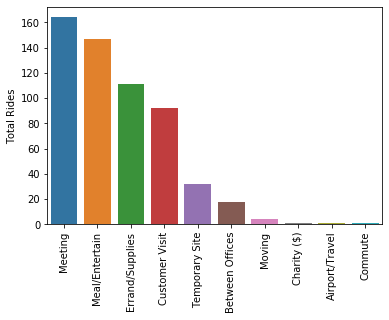

In [30]:
purpose_labels = uber_df.PURPOSE.value_counts().nlargest(10)
sns.barplot(x=purpose_labels.index, y=purpose_labels);
plt.ylabel('Total Rides');
plt.xticks(rotation=90);

In [31]:
uber_df['MILES'].sum()

6423.1

In [32]:
uber_df['DURATION'].sum()

Timedelta('8 days 22:20:00')

In [33]:
#salary column (Total)
uber_df.dtypes

Unnamed: 0                   int64
START_DATE          datetime64[ns]
END_DATE            datetime64[ns]
CATEGORY                    object
START                       object
Latitude                   float64
Longitude                  float64
STOP                        object
Latitude.1                 float64
Longitude.1                float64
MILES                      float64
PURPOSE                     object
SALARY                      object
MONTH                       object
DAY_OF_THE_WEEK             object
DURATION           timedelta64[ns]
money_regex                float64
dtype: object

In [34]:
uber_df['money_regex'] = uber_df['SALARY'].str.replace('[\$\,]','', regex = True)
uber_df['money_regex'] = pd.to_numeric(uber_df['money_regex'])
uber_df['money_regex']

0       10.32
1       10.11
2      136.96
3        9.25
4       15.27
        ...  
566      9.89
567      1.72
568      1.51
569     13.76
570    103.63
Name: money_regex, Length: 571, dtype: float64

In [35]:
uber_df

,Unnamed: 0,START_DATE,END_DATE,CATEGORY,START,Latitude,Longitude,STOP,Latitude.1,Longitude.1,MILES,PURPOSE,SALARY,MONTH,DAY_OF_THE_WEEK,DURATION,money_regex
0,0,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.8,Errand/Supplies,$10.32,Jan,Sat,00:13:00,10.32
1,1,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.7,Meeting,$10.11,Jan,Tues,00:14:00,10.11
2,2,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,27.446706,-80.325606,West Palm Beach,26.715342,-80.053375,63.7,Customer Visit,$136.96,Jan,Wed,01:07:00,136.96
3,3,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,26.715342,-80.053375,West Palm Beach,26.715342,-80.053375,4.3,Meal/Entertain,$9.25,Jan,Wed,00:04:00,9.25
4,4,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,26.715342,-80.053375,Palm Beach,26.705621,-80.036430,7.1,Meeting,$15.27,Jan,Wed,00:05:00,15.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,4.6,Meeting,$9.89,Dec,Fri,00:23:00,9.89
567,567,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.8,Customer Visit,$1.72,Dec,Fri,00:04:00,1.72
568,568,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.7,Meeting,$1.51,Dec,Sat,00:07:00,1.51
569,569,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,7.172485,79.885348,Gampaha,7.084048,80.009831,6.4,Temporary Site,$13.76,Dec,Sat,00:18:00,13.76


In [36]:
uber_df['money_regex'].sum()

13811.189999999999

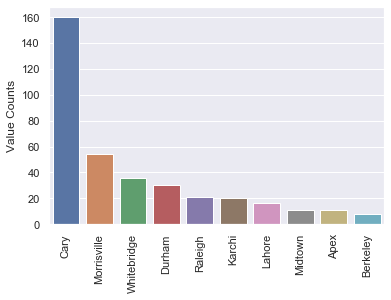

In [37]:
start_labels = uber_df.START.value_counts().nlargest(10)
sns.set(style='darkgrid')
sns.barplot(x=start_labels.index, y=start_labels);
plt.ylabel('Value Counts');
plt.xticks(rotation=90);

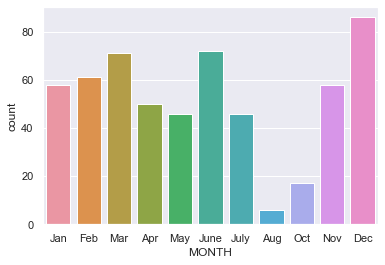

In [38]:
sns.countplot(x=uber_df['MONTH']);
sns.set(style='darkgrid')

In [39]:
miles_dic = {}
for i in uber_df.MILES:
    if i < 10:
        if '0-10 miles' not in miles_dic:
            miles_dic['0-10 miles'] = [i]
        else:
            miles_dic['0-10 miles'].append(i)
            
    elif i >= 10 and i < 20:
        if '10-20 miles' not in miles_dic:
            miles_dic['10-20 miles'] = [i]
        else:
            miles_dic['10-20 miles'].append(i)
    
    elif i >= 20 and i < 30:
        if '20-30 miles' not in miles_dic:
            miles_dic['20-30 miles'] = [i]
        else:
            miles_dic['20-30 miles'].append(i)
            
    elif i >= 30 and i < 40:
        if '30-40 miles' not in miles_dic:
            miles_dic['30-40 miles'] = [i]
        else:
            miles_dic['30-40 miles'].append(i)
            
    elif i >= 40 and i < 50:
        if '40-50 miles' not in miles_dic:
            miles_dic['40-50 miles'] = [i]
        else:
            miles_dic['40-50 miles'].append(i)
    else:
        if 'Above 50 miles' not in miles_dic:
            miles_dic['Above 50 miles'] = [i]
        else:
            miles_dic['Above 50 miles'].append(i)
            


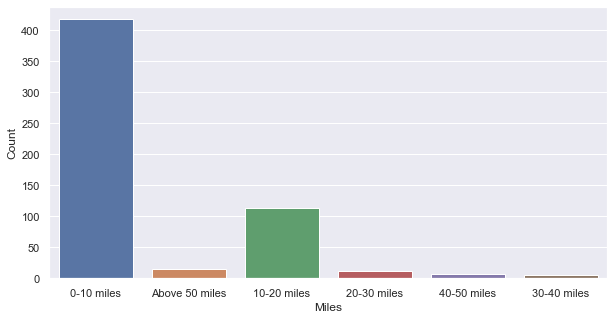

In [40]:
len_miles = []
for key in miles_dic:
    len_miles.append((key, len(miles_dic[key])))
a, b = [], []
for i, j in len_miles:
    a.append(i)
    b.append(j)
plt.figure(figsize=(10, 5))
plt.xticks(rotation=0)
sns.barplot(x=a, y=b)
plt.xlabel('Miles')
plt.ylabel('Count');

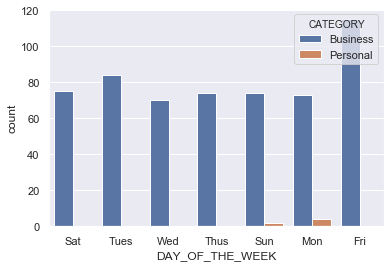

In [41]:
sns.countplot(hue='CATEGORY', x='DAY_OF_THE_WEEK', data=uber_df);
sns.set(style='ticks')

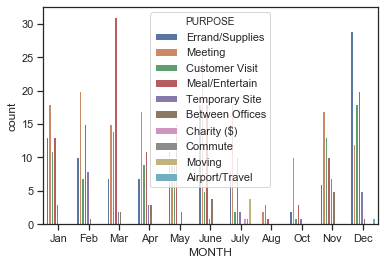

In [42]:
sns.countplot(hue='PURPOSE', x='MONTH', data=uber_df);
sns.set(style='whitegrid')


In [43]:
uber_df

,Unnamed: 0,START_DATE,END_DATE,CATEGORY,START,Latitude,Longitude,STOP,Latitude.1,Longitude.1,MILES,PURPOSE,SALARY,MONTH,DAY_OF_THE_WEEK,DURATION,money_regex
0,0,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.8,Errand/Supplies,$10.32,Jan,Sat,00:13:00,10.32
1,1,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,27.446706,-80.325606,Fort Pierce,27.446706,-80.325606,4.7,Meeting,$10.11,Jan,Tues,00:14:00,10.11
2,2,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,27.446706,-80.325606,West Palm Beach,26.715342,-80.053375,63.7,Customer Visit,$136.96,Jan,Wed,01:07:00,136.96
3,3,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,26.715342,-80.053375,West Palm Beach,26.715342,-80.053375,4.3,Meal/Entertain,$9.25,Jan,Wed,00:04:00,9.25
4,4,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,26.715342,-80.053375,Palm Beach,26.705621,-80.036430,7.1,Meeting,$15.27,Jan,Wed,00:05:00,15.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,4.6,Meeting,$9.89,Dec,Fri,00:23:00,9.89
567,567,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.8,Customer Visit,$1.72,Dec,Fri,00:04:00,1.72
568,568,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,24.860734,67.001136,Karchi,24.860734,67.001136,0.7,Meeting,$1.51,Dec,Sat,00:07:00,1.51
569,569,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,7.172485,79.885348,Gampaha,7.084048,80.009831,6.4,Temporary Site,$13.76,Dec,Sat,00:18:00,13.76


In [44]:
uber_df.to_csv("My_Uber_Trips_(final_file).csv", index=False)